In [1]:
import sys
print(sys.version)

3.6.5 (v3.6.5:f59c0932b4, Mar 28 2018, 05:52:31) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


In [2]:
import os
import json
import pandas as pd
import pandas_profiling
import numpy as np
from scipy import stats
import statsmodels.api as sm
from patsy import dmatrices
from matplotlib import pyplot as plt
import rpy2

In [3]:
%matplotlib inline

# Statistical analysis of feature computations results


## 1. Data importation and manipulation

In [4]:
def get_path_to_all_files(folder_name):
    """Recursively get all filepaths from a directory tree."""

    filepaths = []
    for dirname, dirnames, filenames in os.walk(folder_name):
        for filename in filenames:
            if '.DS_Store' not in filename:
                filepaths.append(os.path.join(dirname, filename))

    return filepaths

### 1.1 Data importation


In [10]:
results_folder = "/Users/Antonin/Documents/VUB/semester 4/thesis/validation study/data/results/feature_data"

In [11]:
files = get_path_to_all_files(results_folder)

#### 1.1.1 Force plate feature data

In [13]:
fp_files = [file for file in files if "FP" in file]
fp_files[1:5]

['/Users/Antonin/Documents/VUB/semester 4/thesis/validation study/data/results/feature_data/Repro2/FP/1_3_cop_features.json',
 '/Users/Antonin/Documents/VUB/semester 4/thesis/validation study/data/results/feature_data/Repro2/FP/2_3_cop_features.json',
 '/Users/Antonin/Documents/VUB/semester 4/thesis/validation study/data/results/feature_data/Repro2/FP/3_3_cop_features.json',
 '/Users/Antonin/Documents/VUB/semester 4/thesis/validation study/data/results/feature_data/Repro2/FP/4_3_cop_features.json']

#### 1.1.2 Wii Balance Board feature data


In [14]:
wbb_files = [file for file in files if "FP" not in file]
wbb_files[1:5]

[]

In [15]:
wbb_files_modified = [filename.replace("BB","FP") for filename in wbb_files]
fp_files_modified = [filename.replace("FP","BB") for filename in fp_files]

In [16]:
fp_files_curated = [file for file in fp_files if file in wbb_files_modified]
wbb_files_curated = [file for file in wbb_files if file in fp_files_modified]

### 1.2 Data manipulation

In [17]:
def create_and_merge_dataframes(files):
    time_frames = []
    frequency_frames = []
    for filepath in files:
        with open(filepath) as json_data:
            features = json.load(json_data)
            time_features = features["time_features"]
            frequency_features = features["frequency_features"]
        time_frames.append(pd.DataFrame(time_features, index=[0]))
        frequency_frames.append(pd.DataFrame(frequency_features,index=[0]))
    
    time_features_df = pd.concat(time_frames, axis=0)
    frequency_features_df = pd.concat(frequency_frames, axis=0)
    
    df1 = time_features_df.reset_index().drop('index', 1)
    df2 = frequency_features_df.reset_index().drop('index', 1)
    
    return (df1,df2)

#### 1.2.1 WBB  features results merging

In [36]:
wbb_time,wbb_freq = create_and_merge_dataframes(wbb_files)

In [37]:
wbb_time.head()

,Mean distance,Mean distance-ML,Mean distance-AP,Rms distance,Rms distance-ML,Rms distance-AP,Path length,Path length-ML,Path length-AP,Mean velocity,...,Mean velocity-AP,Range,Range-ML,Range-AP,95% confidence circle area,Sway area,Mean frequency,Mean frequency-ML,Mean frequency-AP,Fractal dimension-CC
0,1.286711,0.909842,2.291740,1.641025,1.160380,2.596860,72.474429,39.158678,50.708541,3.623721,...,2.535427,4.402383,4.829097,10.418150,27.565218,2.586975,0.448223,0.380415,0.195574,1.491330
1,0.703182,0.497225,1.415108,0.928068,0.656243,1.656221,62.068054,32.112197,43.804062,3.103403,...,2.190203,2.793585,3.796724,5.881467,9.074083,1.419167,0.702410,0.570837,0.273602,1.618534
2,1.483093,1.048705,2.766805,1.816056,1.284146,3.144194,74.312693,43.932942,48.086257,3.715635,...,2.404313,5.612591,6.659028,11.124993,32.314883,3.849951,0.398735,0.370281,0.153616,1.475569
3,1.167159,0.825306,1.720025,1.699695,1.201866,2.177203,82.750999,41.485835,59.898963,4.137550,...,2.994948,7.179226,7.623827,9.409227,32.164217,3.085835,0.564200,0.444304,0.307808,1.507734
4,1.355959,0.958808,0.990054,1.655739,1.170784,1.314741,64.343929,40.131182,39.997993,3.217196,...,1.999900,3.910761,5.353821,7.309682,26.768316,1.350219,0.377617,0.369952,0.357087,1.461416


In [38]:
wbb_freq.head()

,Total power-RD,Total power-ML,Total power-AP,Peak frequency-RD,Peak frequency-ML,Peak frequency-AP,50% power frequency-RD,50% power frequency-ML,50% power frequency-AP,80% power frequency-RD,80% power frequency-ML,80% power frequency-AP
0,0.260064,0.227128,0.168849,0.1000,0.0975,0.095,0.0000,0.0025,0.0000,0.0025,0.0025,0.0025
1,0.146604,0.200362,0.108090,0.1000,0.0950,0.095,0.0000,0.0025,0.0025,0.0025,0.0025,0.0025
2,0.288490,0.206925,0.172962,0.0950,0.0950,0.095,0.0025,0.0025,0.0000,0.0025,0.0025,0.0025
3,0.406596,0.383767,0.225138,0.0975,0.0950,0.095,0.0000,0.0025,0.0000,0.0025,0.0025,0.0025
4,0.251035,0.179327,0.147456,0.0975,0.0950,0.095,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025


#### 1.2.2 FP  features results merging

In [39]:
fp_time,fp_freq = create_and_merge_dataframes(fp_files)

In [40]:
fp_time.head()

,Mean distance,Mean distance-ML,Mean distance-AP,Rms distance,Rms distance-ML,Rms distance-AP,Path length,Path length-ML,Path length-AP,Mean velocity,...,Mean velocity-AP,Range,Range-ML,Range-AP,95% confidence circle area,Sway area,Mean frequency,Mean frequency-ML,Mean frequency-AP,Fractal dimension-CC
0,2.203961,1.558436,3.610467,2.774982,1.962209,4.125284,179.564997,100.753287,125.635048,8.978250,...,6.281752,7.012834,9.031247,17.378599,77.839788,11.001290,0.648347,0.571433,0.307569,1.614303
1,2.057750,1.455049,2.328713,2.492167,1.762228,2.684979,193.044571,123.733949,119.813821,9.652229,...,5.990691,6.428040,8.749907,10.479612,60.007273,9.562263,0.746543,0.751634,0.454764,1.686842
2,2.609107,1.844917,4.133708,3.267717,2.310625,4.728254,189.975309,131.193073,108.878780,9.498765,...,5.443939,8.657418,10.399601,17.671664,107.345110,16.007050,0.579423,0.628534,0.232808,1.579305
3,3.086126,2.182221,2.766626,4.571328,3.232417,3.444359,226.755337,141.154181,142.941496,11.337767,...,7.147075,23.605720,26.658673,15.588367,234.175231,16.184175,0.584701,0.571729,0.456670,1.512362
4,2.404926,1.700539,1.996325,3.079242,2.177353,2.611898,189.374739,113.598044,129.824365,9.468737,...,6.491218,8.984268,11.041311,14.401117,97.408759,8.249465,0.626629,0.590445,0.574804,1.594345


In [41]:
fp_freq.head()

,Total power-RD,Total power-ML,Total power-AP,Peak frequency-RD,Peak frequency-ML,Peak frequency-AP,50% power frequency-RD,50% power frequency-ML,50% power frequency-AP,80% power frequency-RD,80% power frequency-ML,80% power frequency-AP
0,1.063790,0.951825,0.868426,0.1000,0.0975,0.0925,0.0025,0.0025,0.0000,0.0025,0.0025,0.0025
1,1.031724,0.805479,0.989222,0.1050,0.0975,0.0950,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025
2,1.614947,0.790134,1.226742,0.1000,0.0950,0.0950,0.0025,0.0025,0.0000,0.0025,0.0025,0.0025
3,3.709828,1.516901,2.483881,0.0975,0.0950,0.0975,0.0000,0.0025,0.0025,0.0025,0.0025,0.0025
4,1.128054,1.114880,0.740847,0.0950,0.0975,0.0950,0.0000,0.0000,0.0000,0.0025,0.0025,0.0025


## 2. Statistical analysis

### 2.1 General descriptive statistics HTML reports 

In [42]:
outputfile = "/Users/Antonin/Documents/VUB/semester 4/thesis/validation study/notebooks/results/wbb_data_time_domain_report.html"
df_profile = pandas_profiling.ProfileReport(wbb_time, bins=50)
df_profile.to_file(outputfile=outputfile)

### 2.2 Features mean value and standard deviation 

In [43]:
wbb_time_mean_df = pd.DataFrame(wbb_time.mean(), columns = ["WBB mean"])
wbb_time_std_df = pd.DataFrame(wbb_time.std(), columns = ["WBB std"])

In [44]:
wbb_freq_mean_df = pd.DataFrame(wbb_freq.mean(), columns = ["WBB mean"])
wbb_freq_std_df = pd.DataFrame(wbb_freq.std(), columns = ["WBB std"])

In [45]:
fp_time_mean_df = pd.DataFrame(fp_time.mean(), columns = ["FP mean"])
fp_time_std_df = pd.DataFrame(fp_time.std(), columns = ["FP std"])

In [46]:
fp_freq_mean_df = pd.DataFrame(fp_freq.mean(), columns = ["FP mean"])
fp_freq_std_df = pd.DataFrame(fp_freq.std(), columns = ["FP std"])

In [47]:
time_domain_results = pd.concat([wbb_time_mean_df, wbb_time_std_df, fp_time_mean_df, fp_time_std_df], axis = 1)

In [48]:
time_domain_results

,WBB mean,WBB std,FP mean,FP std
Mean distance,1.094186,0.473942,2.113038,0.972997
Mean distance-ML,0.773706,0.335128,1.494144,0.688013
Mean distance-AP,2.214597,1.009684,3.509189,1.515118
Rms distance,1.477048,0.773868,2.884821,1.678744
Rms distance-ML,1.044431,0.547207,2.039876,1.187051
Rms distance-AP,2.925433,2.130539,4.389465,1.913567
Path length,92.808640,110.983516,227.782095,108.204003
Path length-ML,34.410113,23.908884,102.878585,42.876494
Path length-AP,77.481762,108.876283,179.673566,95.026608
Mean velocity,4.665649,5.547627,11.389105,5.410200


### 2.3 Pearson's correlation coefficient and regression lines equations 


In [49]:
coeffs = fp_time.corrwith(wbb_time)

In [50]:
fp_time_cut = fp_time[:wbb_time.shape[0]]

In [51]:
def plot_correlation(df1,df2,name="time_domain"):
    columns = df1.columns
    fig, axs = plt.subplots(8,3,figsize=(20,30),facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5)
    axs[-1, -1].axis('off')
    for ax, column in zip(axs.ravel(), columns):
        x = df1[column]
        y = df2[column]
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        ax.plot(x, y, '.', label='original data')
        ax.plot(x, intercept + slope*x, 'black', label='fitted line', linewidth=0.3)
        ax.set_xlabel('Balance Board')
        ax.set_ylabel('Force plate')
        ax.set_title(column, weight = 600)
        r_squared = round(r_value**2,4)
        ax.text(0.8, 0.9, "p-value = {}".format(round(p_value,4)), fontsize=9, horizontalalignment='center',
                verticalalignment='center', transform=ax.transAxes)
        ax.text(0.8, 0.8, "R\u00b2={}".format(r_squared), fontsize=9, horizontalalignment='center',
                verticalalignment='center', transform=ax.transAxes)
        ax.text(0.8, 0.7, "Slope = {}".format(round(slope,4)), fontsize=9, horizontalalignment='center',
                verticalalignment='center', transform=ax.transAxes)
        ax.text(0.8, 0.6, "Intercept = {}".format(round(intercept,4)), fontsize=9, horizontalalignment='center',
                verticalalignment='center', transform=ax.transAxes)
        #ax.legend()
    plt.savefig("results/{}_correlation_plots.png".format(name), bbox_inches='tight')


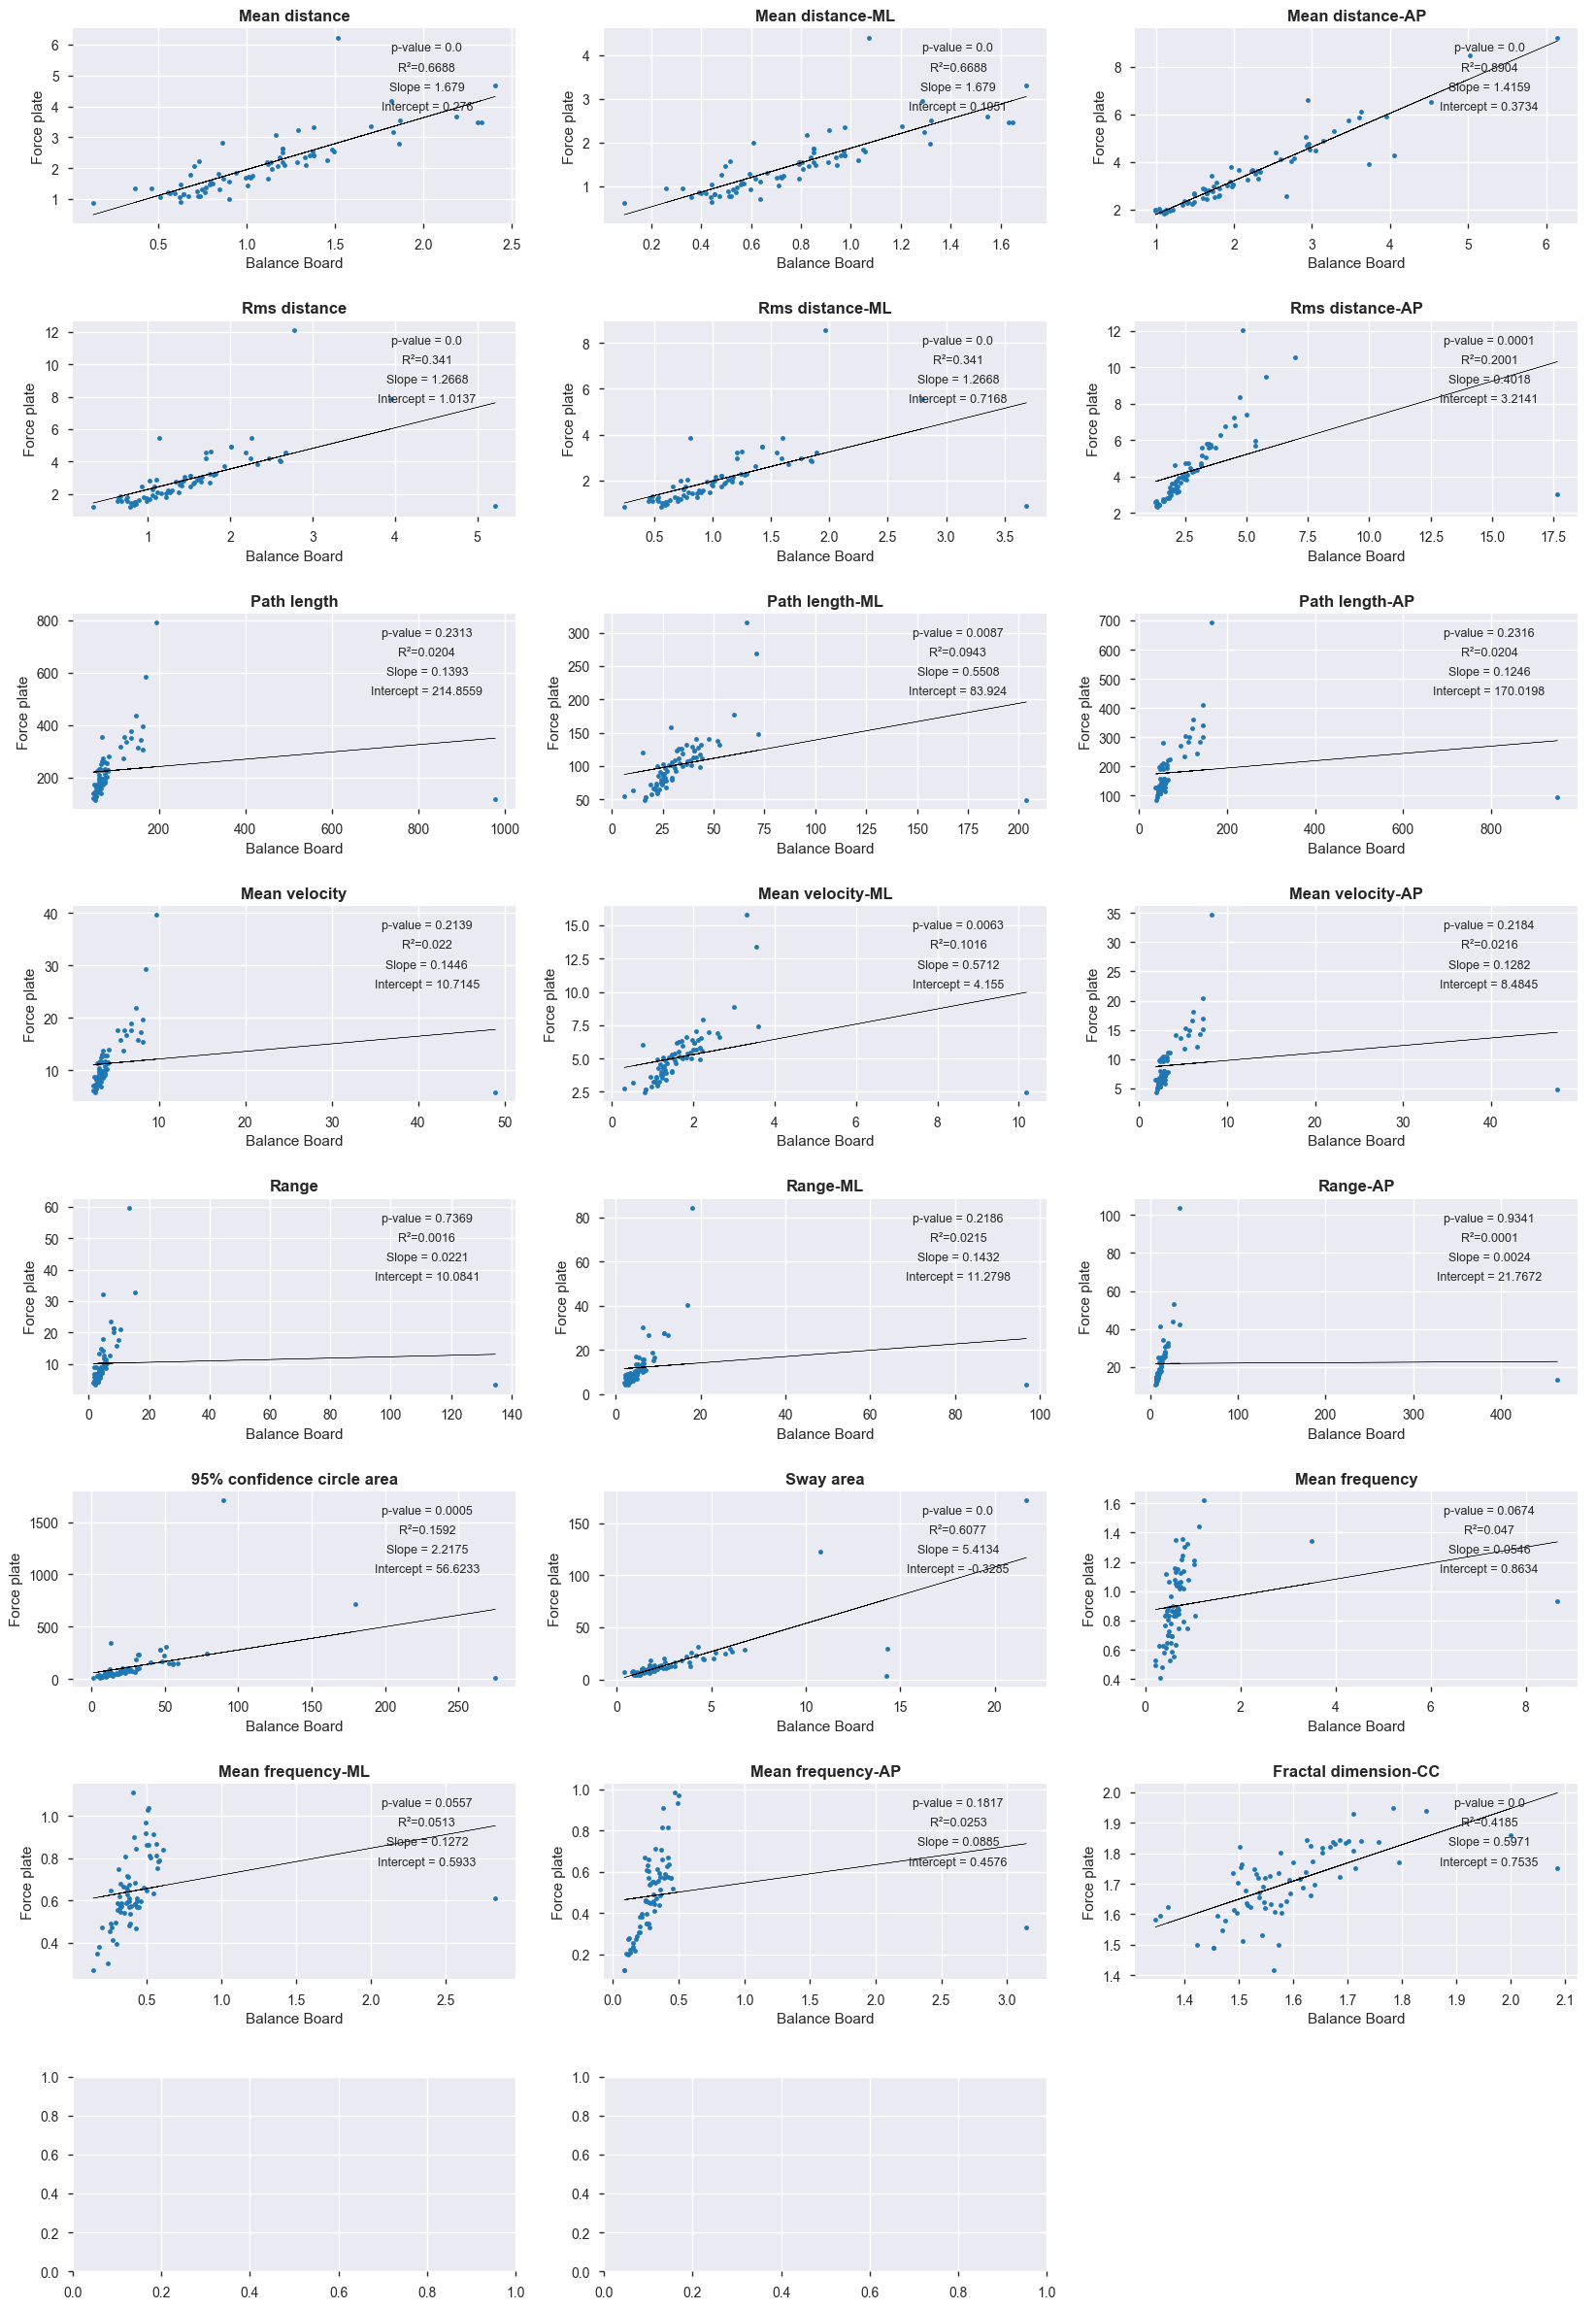

In [52]:
plot_correlation(wbb_time, fp_time_cut)

### 2.4 Bland and Altman plots + LOA (limit of agreement)

In [53]:
def bland_altman_plot(df1, df2, name="time_domain"):
    columns = df1.columns
    fig, axs = plt.subplots(8,3,figsize=(20,30),facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5)
    axs[-1, -1].axis('off')
    for ax, column in zip(axs.ravel(), columns):
        x = df1[column]
        y = df2[column]
        
        data1 = np.asarray(x)
        data2 = np.asarray(y)
        mean = np.mean([x, y], axis=0)
        diff = x - y               
        md = np.mean(diff)               
        sd = np.std(diff, axis=0)

        ax.scatter(mean, diff, marker='.',s=100, color = "gray")
        ax.axhline(md,color='tomato', linestyle='--')
        ax.axhline(md + 2*sd, color='teal', linestyle='--')
        ax.axhline(md - 2*sd, color='teal', linestyle='--')
        ax.set_xlabel('Mean of the two systems')
        ax.set_ylabel('Mean of the difference')
        ax.set_title(column, weight = 600)
        
        #ax.legend()
    plt.savefig("results/{}_bland_altman_plots.png".format(name), bbox_inches='tight')

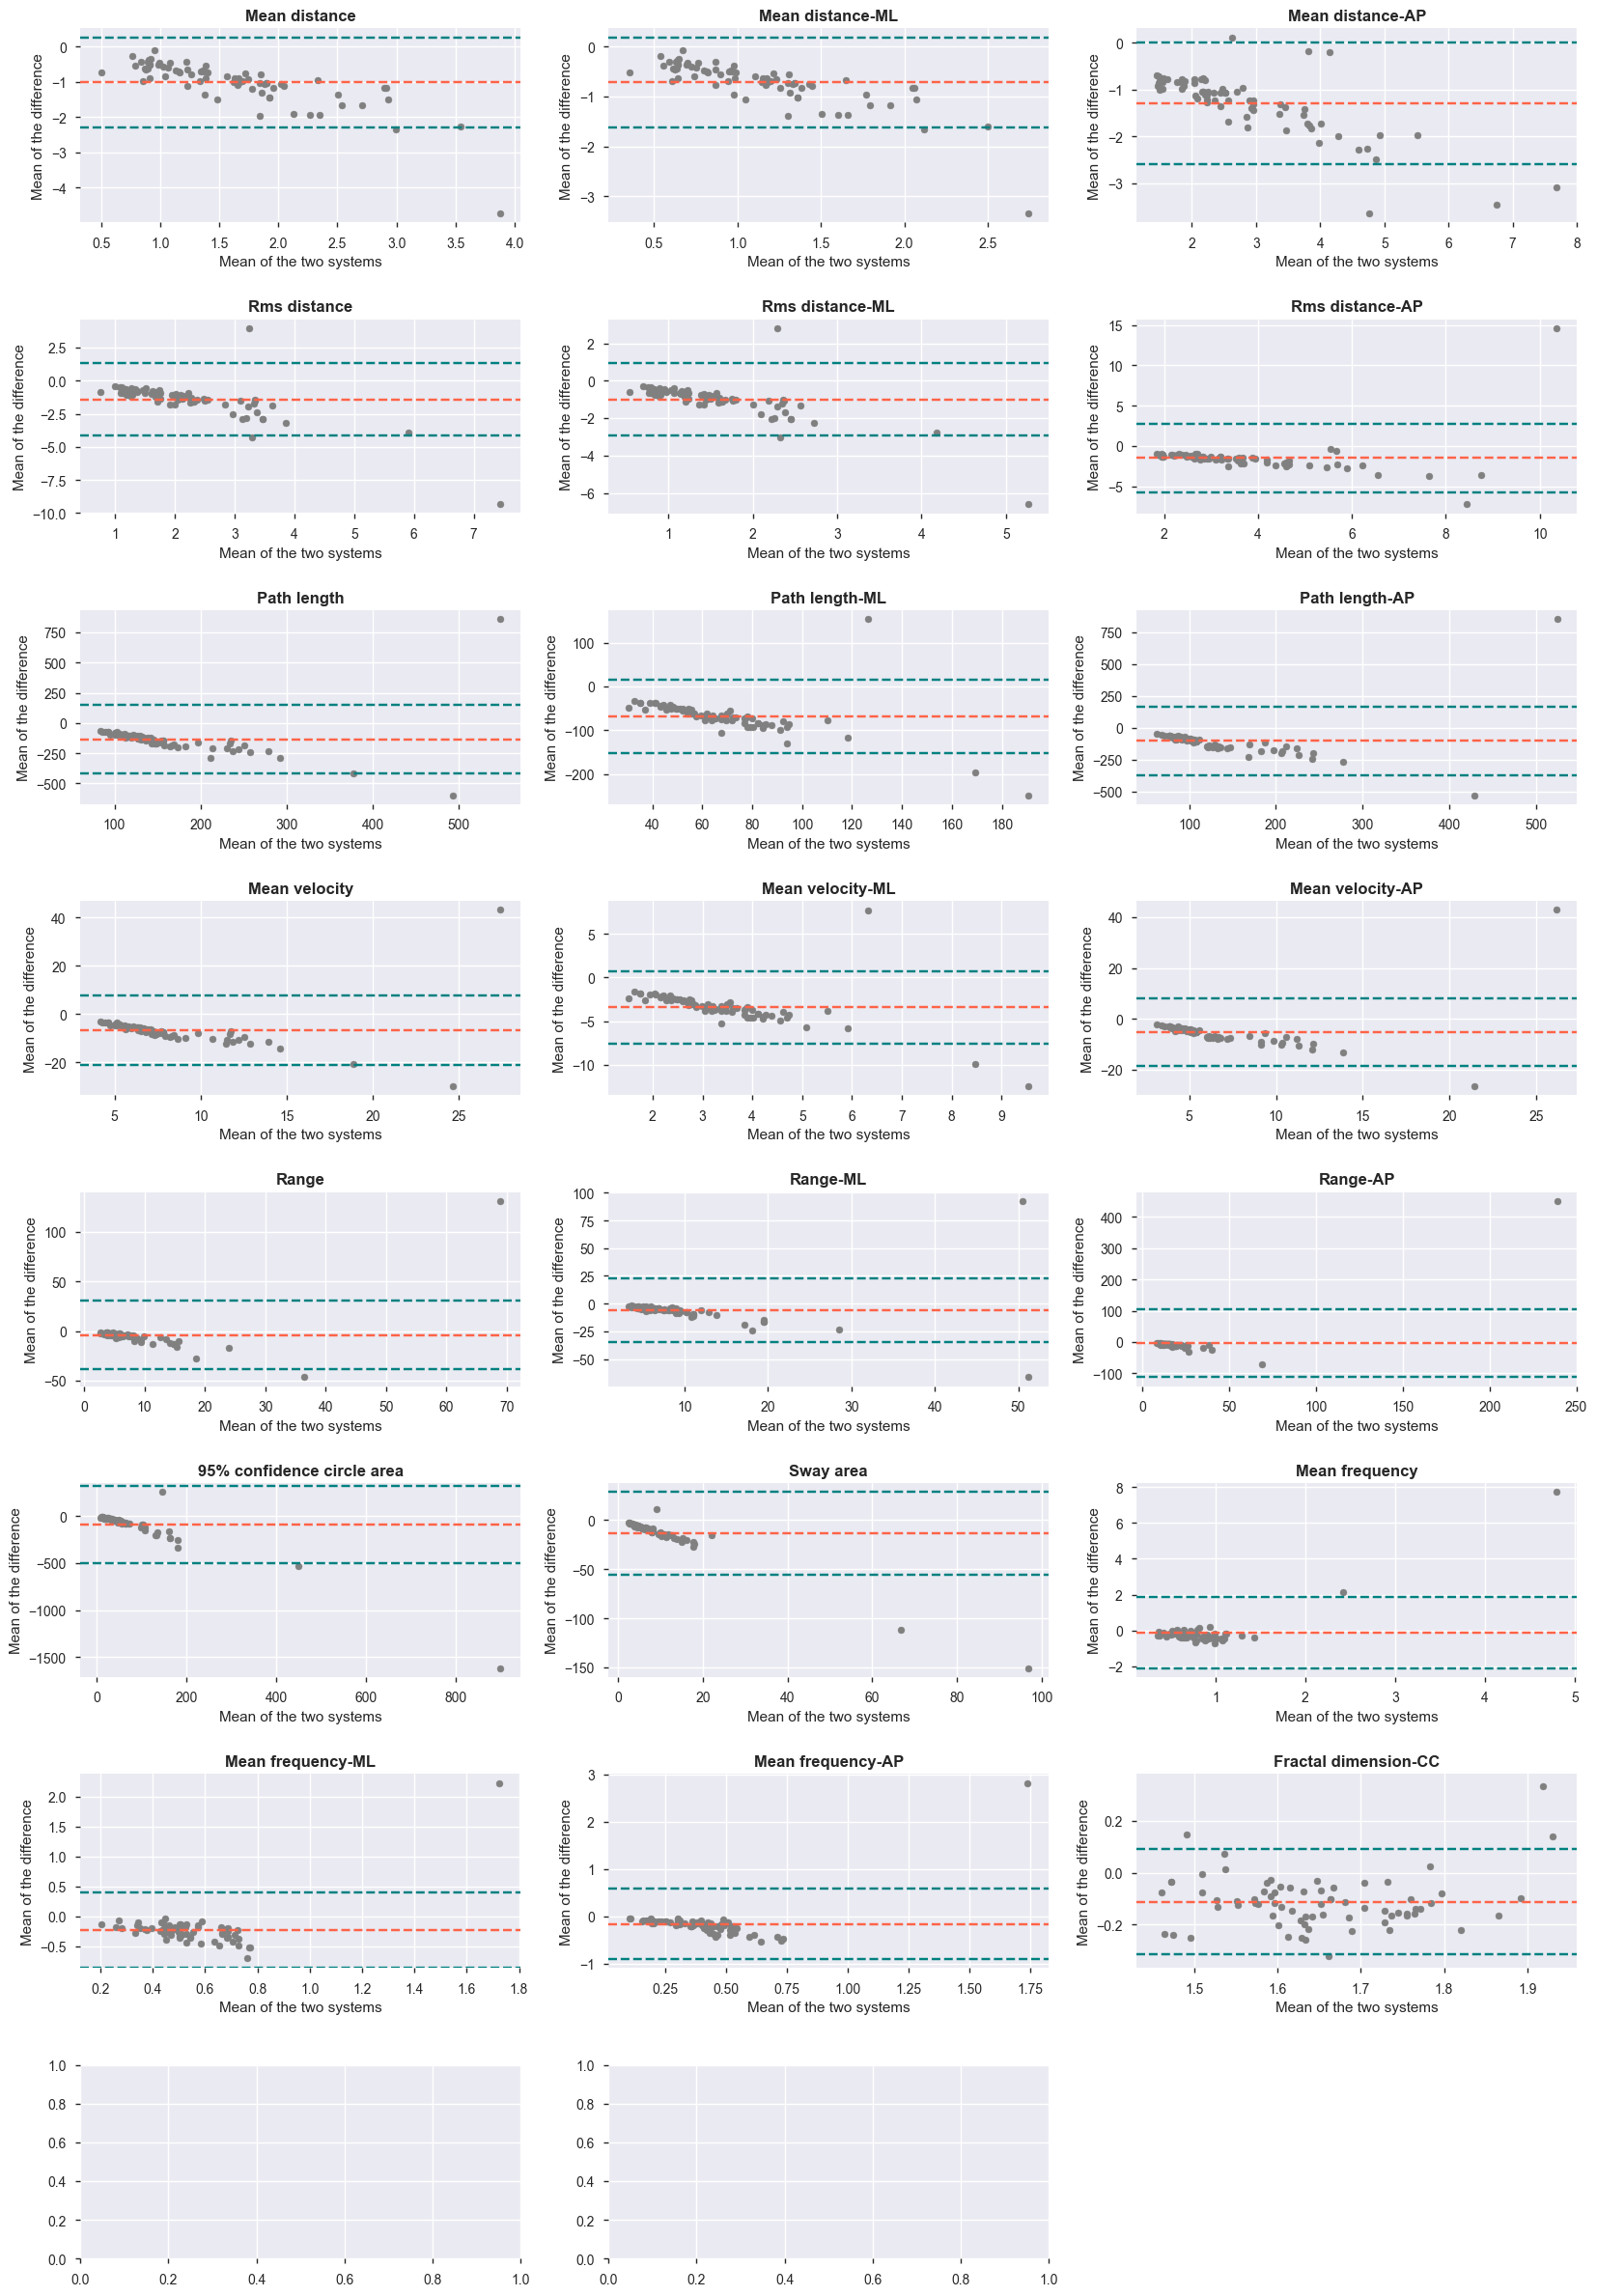

In [54]:
bland_altman_plot(wbb_time, fp_time_cut)

### 2.5 Intraclass correlation coefficient (ICC) 



In [55]:
from rpy2.robjects import DataFrame, FloatVector, pandas2ri
from rpy2.robjects.packages import importr

In [56]:
psych = importr("psych")

In [57]:
df = DataFrame({"WBB Mean distance": FloatVector(wbb_time["Mean distance"]),
                "FP Mean distance": FloatVector(fp_time_cut["Mean distance"])})

In [58]:
icc_res = psych.ICC(df)
iccs_r_df = icc_res[0]
iccs_df = pandas2ri.ri2py(iccs_r_df)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:196: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [59]:
iccs_df

,type,ICC,F,df1,df2,p,lower bound,upper bound
0,ICC1,0.141112,1.328593,71.0,72.0,1.158568e-01,-0.091147,0.359148
1,ICC2,0.342282,4.616782,71.0,71.0,3.985097e-10,-0.100697,0.668007
2,ICC3,0.643924,4.616782,71.0,71.0,3.985097e-10,0.485661,0.761313
3,ICC1k,0.247324,1.328593,71.0,72.0,1.158568e-01,-0.200576,0.528490
4,ICC2k,0.510001,4.616782,71.0,71.0,3.985097e-10,-0.223945,0.800964
5,ICC3k,0.783399,4.616782,71.0,71.0,3.985097e-10,0.653798,0.864484


In [60]:
icc = iccs_df.iloc[5].ICC
icc_lower_bound = iccs_df.iloc[5]["lower bound"]
icc_upper_bound = iccs_df.iloc[5]["upper bound"]

In [61]:
icc_result = "{}({},{})".format(round(icc,4),round(icc_lower_bound,4),round(icc_upper_bound,4))

In [62]:
icc_result

'0.7834(0.6538,0.8645)'